<a href="https://colab.research.google.com/github/yedhuk/basic-machine-learning-algorithms-from-scratch/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

1. Define Sigmoid Function
2. Initialize weights and biases
3. Define Loss function
4. Perform Gradient Descent / Backpropogation
5. Train routine
6. Predict routine

In [34]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [5]:
def init_parameters(n_features):
  w = np.zeros(n_features)
  print(f"Type of weight Matrix : {type(w)}")
  print(f"Shape of weight Matrix : {w.shape}")
  b = 0
  return w,b



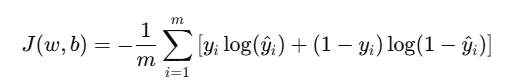

If squared loss is chosed as cost function , it is observed that at higher dimensions the function is not convex leading to many local minima , but a convex function is required for gradient descent to work

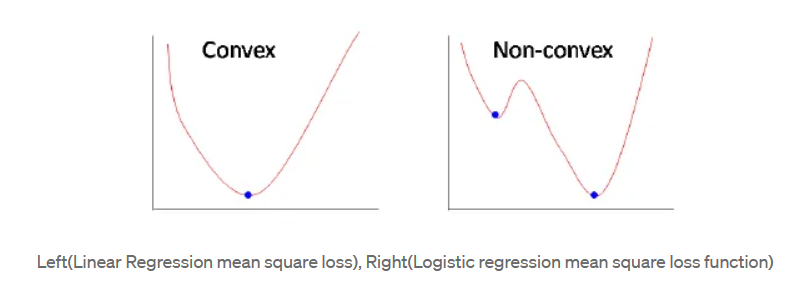

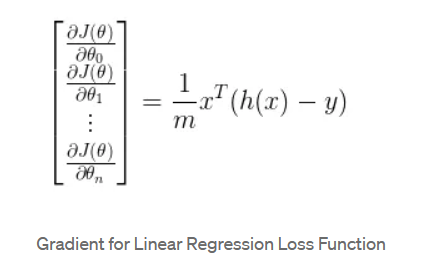

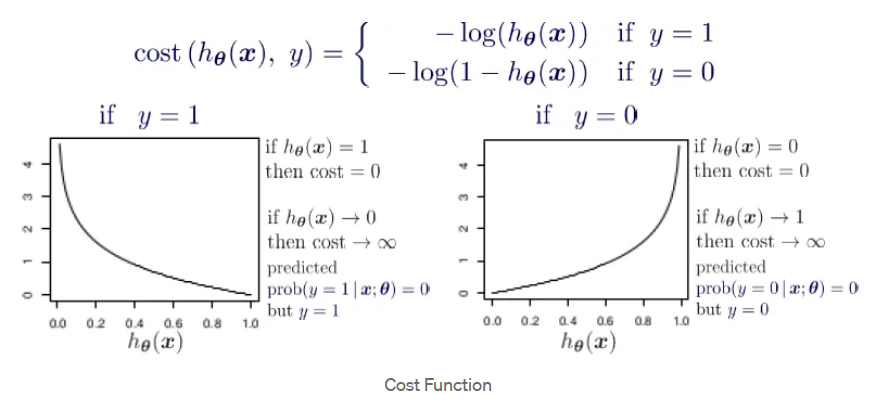

In [6]:
def compute_cost(y,y_pred):
  print(f"Type of y vector : {type(y)}")
  print(f"Shape of y vector : {y.shape}")
  return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

In [30]:
def gradient_descent(X,y,w,b,learning_rate):
  m = X.shape[0]
  print(f"X : {X.shape} * w : {y.shape}")
  y_pred = sigmoid(np.dot(X,w)+b)
  print(f"y_pred : {y_pred}")
  dw = np.dot(X.T,(y_pred - y))/m
  db = np.mean(y_pred - y)

  w -= learning_rate*dw
  b -= learning_rate*db

  return w,b

In [31]:
def train(X,y,learning_rate = 0.01, num_iterations = 1000):
  n_features = X.shape[1]
  w,b = init_parameters(n_features)

  for i in range(num_iterations):
    w,b = gradient_descent(X,y,w,b,learning_rate)

    if(i%100 == 0):
      y_pred = sigmoid(np.dot(X,w)+b)
      #print(f"y pred : {y_pred}")
      cost = compute_cost(y,y_pred)
      print(f"Iteration {i}: Cost = {cost}")

  return w,b

In [36]:
def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    return (y_pred >= 0.5).astype(int)

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [25]:
X,y = load_iris(return_X_y=True,as_frame = False)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [ ]:
w,b = train(X_train,y_train)

In [38]:
y_pred = predict(X_test,w,b)

In [41]:
iris = load_iris()

In [42]:
classification_report(y_test,y_pred,target_names=iris.target_names)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n      setosa       0.00      0.00      0.00        11\n  versicolor       0.43      1.00      0.60        13\n   virginica       0.00      0.00      0.00         6\n\n    accuracy                           0.43        30\n   macro avg       0.14      0.33      0.20        30\nweighted avg       0.19      0.43      0.26        30\n'